## Introduction
In this notebook, I explore the data from the [**Inside Airbnb Project**](http://insideairbnb.com/)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# load data
listings_data = pd.read_csv("data/listings.csv.gz",compression='gzip',
                            header=0,sep=',',quotechar='"',error_bad_lines=False,
                           low_memory=False)

In [3]:
# total listings
listings_data.shape

(24813, 106)

In [4]:
# data overview
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200613063607,2020-06-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.59
1,3176,https://www.airbnb.com/rooms/3176,20200613063607,2020-06-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.09
2,3309,https://www.airbnb.com/rooms/3309,20200613063607,2020-06-15,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.32
3,7071,https://www.airbnb.com/rooms/7071,20200613063607,2020-06-15,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,f,moderate,f,f,2,0,2,0,2.22
4,9991,https://www.airbnb.com/rooms/9991,20200613063607,2020-06-15,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,moderate,f,f,1,1,0,0,0.14


In [5]:
# check data columns
print([x for x in listings_data.columns])

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [6]:
# data summary
listings_data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.481300e+04,2.481300e+04,0.0,0.0,0.0,2.481300e+04,24792.000000,24792.000000,24813.000000,24813.000000,...,19598.000000,19617.000000,19599.000000,19596.000000,0.0,24813.000000,24813.000000,24813.000000,24813.000000,20143.000000
mean,2.211238e+07,2.020061e+13,NaN,NaN,NaN,7.823893e+07,3.813730,3.813730,52.510184,13.405715,...,9.732779,9.742162,9.593143,9.406563,NaN,2.504856,1.557127,0.716802,0.141095,0.800695
std,1.275083e+07,5.531361e+00,NaN,NaN,NaN,8.916216e+07,38.259841,38.259841,0.031711,0.059948,...,0.705917,0.703125,0.744395,0.868193,NaN,5.625141,4.942570,1.205022,1.992237,1.187053
min,2.015000e+03,2.020061e+13,NaN,NaN,NaN,1.581000e+03,0.000000,0.000000,52.340480,13.097180,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.121628e+07,2.020061e+13,NaN,NaN,NaN,1.103664e+07,1.000000,1.000000,52.489100,13.372780,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.150006e+07,2.020061e+13,NaN,NaN,NaN,3.974168e+07,1.000000,1.000000,52.509780,13.416000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.330000
75%,3.324213e+07,2.020061e+13,NaN,NaN,NaN,1.183807e+08,2.000000,2.000000,52.533220,13.439580,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.960000
max,4.376487e+07,2.020061e+13,NaN,NaN,NaN,3.496313e+08,1348.000000,1348.000000,52.656630,13.758420,...,10.000000,10.000000,10.000000,10.000000,NaN,58.000000,58.000000,14.000000,39.000000,23.930000


## 1. Data Processing

In [7]:
# clean up price values
def clean_prices_column(df,col):
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.split('.',expand=True)[0]
    df[col] = df[col].str.replace(',','')
#     df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int,errors='ignore')
    return df

# apply function
# to price, weekly_price,monthly_price,
# security_deposit and cleaning_fee columns
listings_data = clean_prices_column(listings_data,'price')
listings_data = clean_prices_column(listings_data,'weekly_price')
listings_data = clean_prices_column(listings_data,'monthly_price')
listings_data = clean_prices_column(listings_data,'security_deposit')
listings_data = clean_prices_column(listings_data,'cleaning_fee')
listings_data = clean_prices_column(listings_data,'extra_people')


- As shown below, most apartments cost less than $500

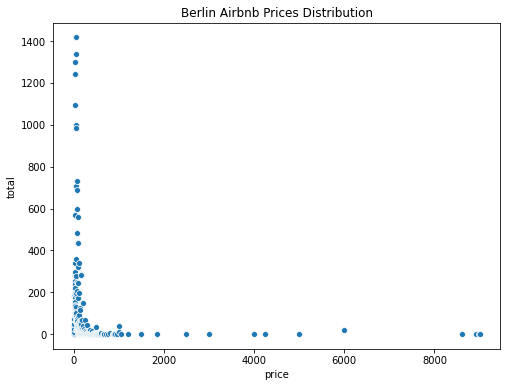

In [38]:
# create price distribution summary
price_dist = listings_data.groupby('price')['id'].count().rename('total').reset_index().sort_values(by='price',ascending=True)

# plot distribution
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('price','total',data=price_dist,ax=ax)
plt.title("Berlin Airbnb Prices Distribution")
plt.show()


In [9]:
# check listings that cost more than $2500
listings_with_prices_above_2500 = listings_data[listings_data['price']>2500]
print("Total of",listings_with_prices_above_2500.shape[0],"listings which is",
      str(round((listings_with_prices_above_2500.shape[0]/len(listings_data))*100,2))+"% of the dataset")

Total of 29 listings which is 0.12% of the dataset


- This is a small number and we can consider excluding them from the overall data
- I suspect the issue is using comma as a separator instead of dot for decimal values

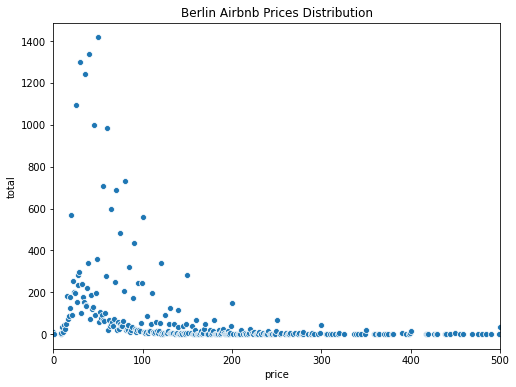

In [39]:
# zoom in apartments that cost $500 or less
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('price','total',data=price_dist,ax=ax)
plt.xlim(0,500)
plt.title("Berlin Airbnb Prices Distribution")
plt.show()

In [11]:
# calculate distance in km from the city center
from math import radians,cos,sin,asin,sqrt

# define berlin center coordinates
center_lat = 52.521948
center_lon = 13.413698

# define harvesine function
def calculate_distance_from_city_center(df,lat,lon,center_lat,center_lon):
    """
    Calculates the great distance circle between
    two gps coordinates
    """
    # convert decimal degrees to radians
    df['lat1'] = df[lat].apply(lambda x : radians(x))
    df['lon1'] = df[lon].apply(lambda x : radians(x))
    lat2 = radians(center_lat)
    lon2 = radians(center_lon)
    
    # calculate harvesine distance
    df['dlat'] = lat2-df['lat1']
    df['dlon'] = lon2-df['lon1']
    
    df['sin_dlat'] = df['dlat'].apply(lambda x : sin(x/2)**2)
    df['cos_lat1'] = df['lat1'].apply(lambda x : cos(x))
    df['sin_dlon'] = df['dlon'].apply(lambda x : sin(x/2)**2)
    
    df['a'] = df['sin_dlat']+df['cos_lat1']*cos(lat2)*df['sin_dlon']
    df['distance'] = df['a'].apply(lambda x : round(2*asin(sqrt(x))*6371,3))
    
    # drop calculation columns
    df = df.drop(['sin_dlat','sin_dlon','cos_lat1','lat1','lon1','dlat','dlon','a'],axis=1)
    
    return df

# apply function
listings_data = calculate_distance_from_city_center(listings_data,
                                                               'latitude','longitude',center_lat,center_lon)

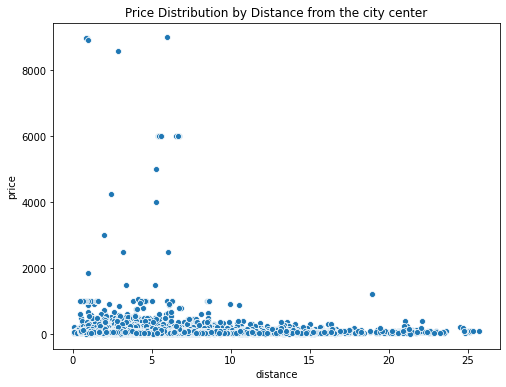

In [12]:
# plot price distribution against distance
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('distance','price',data=listings_data,ax=ax)
plt.title("Price Distribution by Distance from the city center")
plt.show()

In general, prices are lower as you move away from the city center

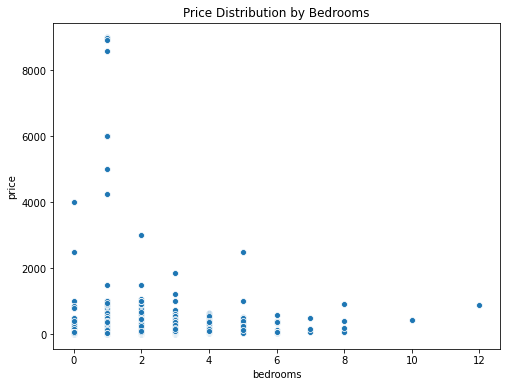

In [13]:
# plot price distribution against number of bedrooms
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('bedrooms','price',data=listings_data,ax=ax)
plt.title("Price Distribution by Bedrooms")
plt.show()

There are one-bedroom apartments that are quite expensive, but there is no clear linear relationship between prices and the number of bedrooms

In the graph below, we look at apartments that cost less than $2000<br>
It seems cheaper to rent an apartments with more than 4 bedrooms

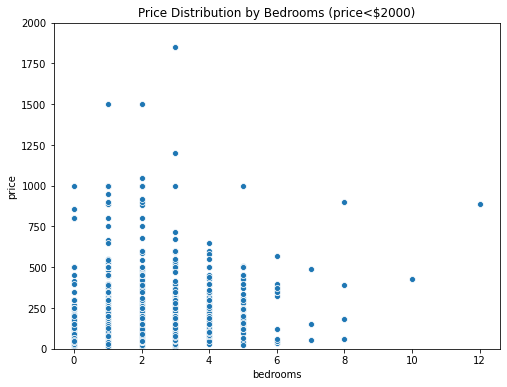

In [14]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('bedrooms','price',data=listings_data,ax=ax)
plt.ylim(0,2000)
plt.title("Price Distribution by Bedrooms (price<$2000)")
plt.show()

In [15]:
# average prices by room type
listings_data.groupby('room_type')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

,room_type,avg_price
2,Private room,44.333977
3,Shared room,75.364821
0,Entire home/apt,86.796193
1,Hotel room,844.262500


It's cheaper to stay in a private room

In [16]:
# average prices by superhost
listings_data.groupby('host_is_superhost')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

,host_is_superhost,avg_price
0,f,71.767679
1,t,86.408808


You could save a few dollars by staying with non-superhost!

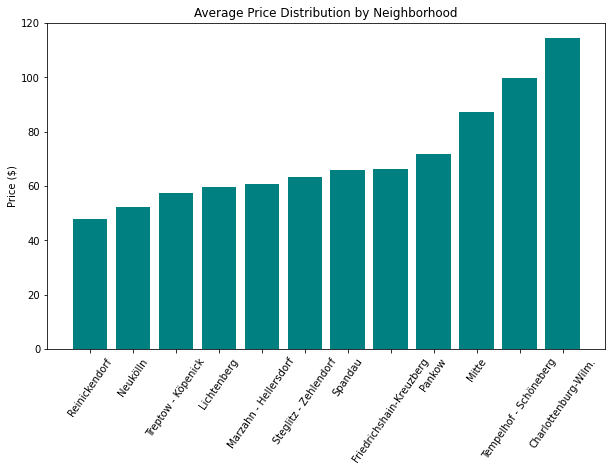

In [77]:
# how do these prices differ by neighbourhood?
neighborhood_group_summary = listings_data.groupby('neighbourhood_group_cleansed')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')
neighborhood_group_summary.columns = ['neighborhood','avg_price']
fig,ax = plt.subplots(figsize=(10,6))
plt.bar('neighborhood','avg_price',color='teal',data=neighborhood_group_summary)
plt.xticks(rotation=55)
plt.ylabel('Price ($)')
plt.title("Average Price Distribution by Neighborhood")
plt.show()

- Charlettenburg-Wilmersdof borough has the most expensive airbnb apartments on average ($114)

- Reinickendorf apartments are the cheapest ($48)

In [18]:
# we can also check prices by neighbourhood
listings_data.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')[0:10]

,neighbourhood_group_cleansed,neighbourhood_cleansed,avg_price
35,Lichtenberg,Neu-Hohenschönhausen Süd,22.000000
40,Marzahn - Hellersdorf,Hellersdorf-Süd,30.142857
43,Marzahn - Hellersdorf,Marzahn-Mitte,31.200000
30,Lichtenberg,Friedrichsfelde Süd,31.551020
90,Reinickendorf,West 4,34.857143
58,Neukölln,Gropiusstadt,35.533333
103,Steglitz - Zehlendorf,Lankwitz,36.516129
92,Spandau,Brunsbütteler Damm,37.083333
98,Spandau,Siemensstadt,37.125000
85,Reinickendorf,Ost 1,40.830769


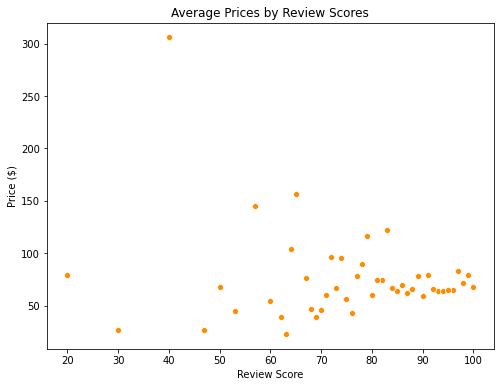

In [83]:
# plot average prices by review score rating
review_score_rating_sum = listings_data.groupby(['review_scores_rating'])['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

#plot distribution
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('review_scores_rating','avg_price',color='darkorange',data=review_score_rating_sum,ax=ax)
# plt.ylim(0,200)
plt.title("Average Prices by Review Scores")
plt.ylabel('Price ($)')
plt.xlabel('Review Score')
plt.show()

- Apartments with high review score ratings are more expensive

## 2. Feature Selection

In [20]:
# check percentage of missing values by column
percent_missing_values = round((listings_data.isnull().sum()/len(listings_data))*100,2)
percent_missing_values = pd.DataFrame({"column_name":listings_data.columns,
                                     "%_missing_values":percent_missing_values})
percent_missing_values = percent_missing_values.reset_index(drop=True)

# sort by % of missing values
percent_missing_values = percent_missing_values.sort_values(by='%_missing_values',ascending=False)
print(len(percent_missing_values[percent_missing_values['%_missing_values']>30]))
columns_missing_more_than_30_pct_vals = [x for x in percent_missing_values[percent_missing_values['%_missing_values']>30]['column_name']]
print(columns_missing_more_than_30_pct_vals)

21
['xl_picture_url', 'jurisdiction_names', 'medium_url', 'thumbnail_url', 'square_feet', 'monthly_price', 'license', 'weekly_price', 'notes', 'host_response_rate', 'host_response_time', 'access', 'house_rules', 'interaction', 'host_about', 'neighborhood_overview', 'transit', 'security_deposit', 'host_acceptance_rate', 'space', 'cleaning_fee']


- We have 21 columns with more than 30% values missing
- We can drop these columns from our data

In [21]:
# drop columns with more than 30% missing values
reshaped_listings_data = listings_data.drop(columns_missing_more_than_30_pct_vals,axis=1)
reshaped_listings_data.shape

(24813, 86)

In [91]:
# columns missing between 5% & 30
cols_btn_5_and_30pct_missing_val = percent_missing_values[(percent_missing_values['%_missing_values']>=5) &
                                (percent_missing_values['%_missing_values']<=30)]
cols_btn_5_and_30pct_missing_val

,column_name,%_missing_values
31,host_neighbourhood,24.60
92,review_scores_value,21.03
89,review_scores_checkin,21.02
91,review_scores_location,21.01
90,review_scores_communication,20.94
87,review_scores_accuracy,20.93
88,review_scores_cleanliness,20.92
86,review_scores_rating,20.82
84,first_review,18.82
105,reviews_per_month,18.82


In [95]:
# check columns with missing data
cols_to_check =  [x for x in cols_btn_5_and_30pct_missing_val['column_name'].unique()]
listings_data[cols_to_check].head()

,host_neighbourhood,review_scores_value,review_scores_checkin,review_scores_location,review_scores_communication,review_scores_accuracy,review_scores_cleanliness,review_scores_rating,first_review,reviews_per_month,last_review,summary
0,Mitte,9.0,10.0,10.0,10.0,10.0,9.0,93.0,2016-04-11,2.59,2020-04-03,Great location! 30 of 75 sq meters. This wood...
1,Prenzlauer Berg,9.0,9.0,10.0,9.0,9.0,9.0,93.0,2009-06-20,1.09,2020-05-27,This beautiful first floor apartment is situa...
2,Schöneberg,9.0,9.0,9.0,10.0,9.0,9.0,89.0,2013-08-12,0.32,2019-05-31,First of all: I prefer short-notice bookings. ...
3,Prenzlauer Berg,9.0,10.0,10.0,10.0,10.0,10.0,97.0,2009-08-18,2.22,2020-03-31,Cozy and large room in the beautiful district ...
4,Prenzlauer Berg,10.0,10.0,10.0,10.0,10.0,10.0,100.0,2015-08-09,0.14,2020-01-04,4 bedroom with very large windows and outstand...


Keeping these columns for now so that we can impute the missing values

In [23]:
# drop listing where country code is not Germany
# we only have one
reshaped_listings_data = reshaped_listings_data[reshaped_listings_data['country_code']=='DE']

In [24]:
# columns to check later: 
# host_since, amenities,calendar_updated,
# 'street','first_review', 'last_review','smart_location','neighbourhood','calendar_last_scraped'

# create list of potential features
working_list = ['id','host_is_superhost',
                'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
                'host_identity_verified', 'neighbourhood_cleansed',
                'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
                'latitude', 'longitude', 'is_location_exact', 'property_type',
                'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
                'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                'has_availability', 'availability_30', 'availability_60', 
                'availability_90', 'availability_365', 'number_of_reviews',
                'number_of_reviews_ltm','review_scores_rating', 
                'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                'requires_license', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
                'require_guest_profile_picture', 'require_guest_phone_verification',
                'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                'reviews_per_month', 'distance']

# select the columns we need
reshaped_listings_data = reshaped_listings_data[working_list]
reshaped_listings_data = reshaped_listings_data.copy()
print(reshaped_listings_data.shape)
reshaped_listings_data.head()

(24812, 58)


,id,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance
0,2015,f,Mitte,8.0,8.0,t,Brunnenstr. Süd,Mitte,Berlin,Berlin,...,f,strict_14_with_grace_period,f,f,7,7,0,0,2.59,1.590
1,3176,f,Prenzlauer Berg,1.0,1.0,t,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,...,f,strict_14_with_grace_period,f,f,1,1,0,0,1.09,1.475
2,3309,f,Schöneberg,1.0,1.0,f,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,...,f,strict_14_with_grace_period,f,f,1,0,1,0,0.32,5.073
3,7071,t,Prenzlauer Berg,2.0,2.0,t,Helmholtzplatz,Pankow,Berlin,Berlin,...,f,moderate,f,f,2,0,2,0,2.22,2.361
4,9991,f,Prenzlauer Berg,1.0,1.0,t,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,...,f,moderate,f,f,1,1,0,0,0.14,1.242


We now have 59 columns to work with

In [25]:
# clean up zip code column
reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10969\n10969','10969',reshaped_listings_data['zipcode'])
reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10777 Berlin','10777',reshaped_listings_data['zipcode'])
reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10997 Kreuzberg','10997',reshaped_listings_data['zipcode'])
reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10119 Berlin','10119',reshaped_listings_data['zipcode'])
reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='13359 Berlin','13359',reshaped_listings_data['zipcode'])
reshaped_listings_data['zipcode'] = reshaped_listings_data['zipcode'].fillna(0).astype(int)
# reshaped_listings_data['zipcode'] = np.where(reshaped_listings_data['zipcode']=='10997 Kreuzberg','10997',reshaped_listings_data['zipcode'])


In [26]:
#
# reshaped_listings_data['zipcode'].isnull().sum()

In [27]:
# use one-hot encoding for categorical data
columns_to_encode = ['host_neighbourhood','host_is_superhost','host_identity_verified','is_location_exact','neighbourhood_cleansed','neighbourhood_group_cleansed', 'city','state',
                    'property_type','room_type','bed_type','requires_license','has_availability',
                     'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
                     'require_guest_profile_picture', 'require_guest_phone_verification']

encoded_listings_data = pd.get_dummies(reshaped_listings_data,
                                       columns=columns_to_encode)


In [28]:
reshaped_listings_data['bed_type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch', nan],
      dtype=object)

In [96]:
# overview of the data we encoded
encoded_listings_data.head()

,id,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2015,8.0,8.0,10119,52.53454,13.40256,3,1.0,1.0,0.0,...,1,0,0,1,0,0,1,0,1,0
1,3176,1.0,1.0,10405,52.53500,13.41758,4,1.0,1.0,2.0,...,1,0,0,1,0,0,1,0,1,0
2,3309,1.0,1.0,10777,52.49885,13.34906,1,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0
3,7071,2.0,2.0,10437,52.54316,13.41509,2,1.0,1.0,2.0,...,1,0,1,0,0,0,1,0,1,0
4,9991,1.0,1.0,10405,52.53303,13.41605,7,2.5,4.0,7.0,...,1,0,1,0,0,0,1,0,1,0


In [30]:
# Impute missing values for integer columns
listings_int_values_data = encoded_listings_data.iloc[:,1:40]
total_vals_missing = listings_int_values_data.isnull().sum()
listings_int_values_df = pd.DataFrame({'column_name':listings_int_values_data.columns,
                           'total_missing_vals':total_vals_missing})
listings_int_values_df = listings_int_values_df.reset_index(drop=True).sort_values('total_missing_vals',ascending=False)

# define list of columns to impute
columns_to_impute = [x for x in listings_int_values_df[listings_int_values_df['total_missing_vals']>0]['column_name']]

# impute missing values with mean
for col in columns_to_impute:
    mean_val = round(np.mean(encoded_listings_data[col]),1)
    encoded_listings_data[col] = encoded_listings_data[col].fillna(mean_val)


In [31]:
# data overview
encoded_listings_data['id'] = encoded_listings_data['id'].astype(str)
encoded_listings_data.head()

,id,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2015,8.0,8.0,10119,52.53454,13.40256,3,1.0,1.0,0.0,...,1,0,0,1,0,0,1,0,1,0
1,3176,1.0,1.0,10405,52.53500,13.41758,4,1.0,1.0,2.0,...,1,0,0,1,0,0,1,0,1,0
2,3309,1.0,1.0,10777,52.49885,13.34906,1,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0
3,7071,2.0,2.0,10437,52.54316,13.41509,2,1.0,1.0,2.0,...,1,0,1,0,0,0,1,0,1,0
4,9991,1.0,1.0,10405,52.53303,13.41605,7,2.5,4.0,7.0,...,1,0,1,0,0,0,1,0,1,0


In [99]:
# encoded_listings_data['host_listings_count'].plot()

In [100]:
# encoded_listings_data['host_total_listings_count'].plot()

## 2.1 Feature Importance

In [32]:
# Create first model using random forest regressor

# prepare data for model
X = encoded_listings_data.drop(['id','price','zipcode'],axis=1)
y = encoded_listings_data['price']

# model the data
model = RandomForestRegressor()
model.fit(X,y)

# get feature importance
feat_importances = model.feature_importances_
col_list = [x for x in X.columns]
feat_list = {}
for i,v in enumerate(feat_importances):
#     print("Feature: %0d, Score: %.5f" %(i,v))
    feat_list[col_list[i]]=v

# create feature importance dataframe
feature_importances_df = pd.DataFrame(feat_list.items(),columns=['feature','score'])
feature_importances_df = feature_importances_df.sort_values('score',ascending=False)

# create a list of top 50 features
top_50_features_list = [x for x in feature_importances_df[:50]['feature']]

feature_importances_df[0:50]

,feature,score
428,city_Schöneberg,0.271077
350,neighbourhood_cleansed_Volkspark Wilmersdorf,0.236242
36,distance,0.113255
511,room_type_Hotel room,0.048656
35,reviews_per_month,0.028485
260,neighbourhood_cleansed_Frankfurter Allee Nord,0.018292
4,accommodates,0.017290
25,review_scores_accuracy,0.013528
2,latitude,0.012684
14,minimum_maximum_nights,0.010677


## 3. Modeling

In [101]:
# prepare data fro modeling
top_50_features_list = [x for x in feature_importances_df[:50]['feature']]
X = encoded_listings_data[top_50_features_list]
y = encoded_listings_data['price']

# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# create a model
model = RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor()

In [102]:
# make predictions with the model
y_pred = model.predict(X_test)

# get R^2 score
model_score = model.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
print(model_score)
print("RMSE:",mse**(1/2))

0.9305675541872152
RMSE: 52.49505568012342


The model returned a good R^2 score of 0.93
The root mean squared error is 52.5. A $52 difference between our predicted prices and the actual values is high and we need to minimize this error through more iterations

We can take a look at random values in predictions & actual data

In [103]:
y_pred[500]

56.41

In [104]:
X_test[500:501]

,city_Schöneberg,neighbourhood_cleansed_Volkspark Wilmersdorf,distance,room_type_Hotel room,reviews_per_month,neighbourhood_cleansed_Frankfurter Allee Nord,accommodates,review_scores_accuracy,latitude,minimum_maximum_nights,...,neighbourhood_cleansed_Rixdorf,host_identity_verified_f,bed_type_Real Bed,review_scores_communication,number_of_reviews,neighbourhood_cleansed_Neue Kantstraße,room_type_Entire home/apt,calculated_host_listings_count,availability_365,host_listings_count
10607,0,0,1.333,0,3.51,0,2,10.0,52.52408,14,...,0,1,1,10.0,126,0,0,1,0,1.0


In [105]:
listings_data[10607:10608]['price']

10607    60
Name: price, dtype: int64